In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Linear Regression

- member 1

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn import datasets

boston = datasets.load_boston()
# print(boston)
# 데이터의 모양, 특성, 칼럼 파악

print(boston.keys()) # 딕셔너리 형식
print(boston.data.shape)
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
# 데이터프레임으로 변환

data = pd.DataFrame(boston.data)
# 컬럼명을 feature_names로 변경

data.columns = boston.feature_names
# data.head()
# 특정 요인과 집값간의 상관관계를 분석해야 하는데 집값 데이터가 보이지 않음
# 집값 비교를 위해 target이라는 키에 저장되어 있는 집값을 불러와야 함

data['Price'] = boston.target
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


-----

### feedback

In [ ]:
boston = load_boston()
data = pd.DataFrame(boston.data,columns=[boston.feature_names.tolist()])
data['Price'] = boston.target

----

<AxesSubplot:xlabel='RM', ylabel='Price'>

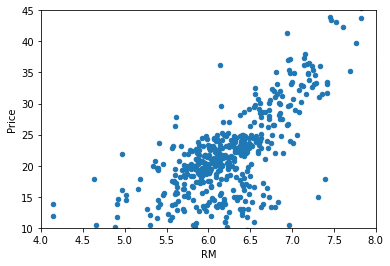

In [5]:
data.plot(kind = "scatter", x = "RM", y = "Price", xlim = (4, 8), ylim = (10, 45))

In [6]:
from sklearn.linear_model import LinearRegression

# sklearn 라이브러리의 LinearRegression() 함수로 회귀분석 모형 객체를 생성하여 linear_regression에 저장
linear_regression = LinearRegression()

linear_regression.fit(X = pd.DataFrame(data['RM']), y = data['Price'])
prediction = linear_regression.predict(X = pd.DataFrame(data['RM']))

print('alpha=', linear_regression.intercept_) # y절편
print('beta=', linear_regression.coef_) # 기울기

alpha= -34.670620776438554
beta= [9.10210898]


In [8]:
# 잔차
y = data['Price']
residuals = y - prediction
residuals.describe()

count    5.060000e+02
mean    -1.330512e-15
std      6.609606e+00
min     -2.334590e+01
25%     -2.547477e+00
50%      8.976267e-02
75%      2.985532e+00
max      3.943314e+01
Name: Price, dtype: float64

In [9]:
# R_squared : 결정계수의 값이 클수록 모형의 예측 능력이 좋다고 본다

SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)

R_squared:  0.4835254559913341


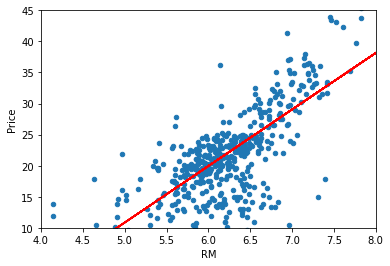

In [10]:
data.plot(kind = "scatter", x = 'RM', y = 'Price',  xlim = (4, 8), ylim = (10, 45))
plt.plot(data['RM'], prediction, color = 'red')

----

### feedback

(10.0, 45.0)

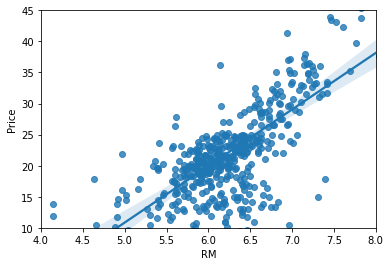

In [14]:
sns.regplot(x = data['RM'],y= data['Price'])
plt.xlim([4, 8])
plt.ylim([10, 45])

-----

- member 2

In [15]:
#배달 거리 단위: m, 배달 시간 단위: min
data = np.array([[100, 20], 
        [150, 24], 
        [300, 36], 
        [400, 47], 
        [130, 22], 
        [240, 32],
        [350, 47], 
        [200, 42], 
        [100, 21], 
        [110, 21], 
        [190, 30], 
        [120, 25], 
        [130, 18], 
        [270, 38], 
        [255, 28]]) 
x = [i[0] for i in data]
y = [i[1] for i in data]

#x와 y의 평균값
mx = np.mean(x)
my = np.mean(y)

print("평균 배달 거리: ", mx)
print("평균 배달 시간: ", my)

평균 배달 거리:  203.0
평균 배달 시간:  30.066666666666666


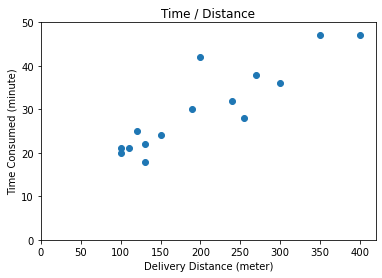

In [16]:
plt.scatter(data[:, 0], data[:, 1]) 
plt.title("Time / Distance")
plt.xlabel("Delivery Distance (meter)")
plt.ylabel("Time Consumed (minute)")
plt.axis([0, 420, 0, 50])
plt.show()

In [17]:
#기울기 공식의 분모
divisor = sum([(mx - i) **2 for i in x])
#기울기 공식의 분자
def top(x, mx, y, my):
    d = 0
    for i in range(len(x)):
        d += (x[i] - mx) * (y[i] - my)
    return d
dividend = top(x, mx, y, my)
print("분모: ", divisor)
print("분자: ", dividend)
#기울기와 y 절편 구하기
a = dividend / divisor
b = my - (mx * a)

print("기울기 a = ", a)
print("y 절편 b = ", b)
x = np.array(x)
y = np.array(y)

model = LinearRegression()
model.fit(x.reshape(-1, 1), y)
model.predict([[500]])

분모:  128790.0
분자:  11887.000000000002
기울기 a =  0.09229753862877554
y 절편 b =  11.330266325025232


array([57.47903564])

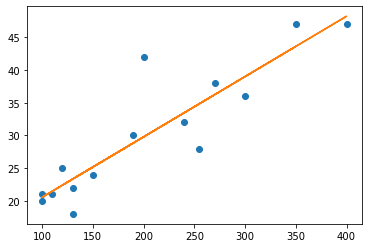

In [18]:
plt.plot(x, y, 'o')
plt.plot(x, model.predict(x.reshape(-1,1)))
plt.show()

- member 3

In [21]:
data = pd.DataFrame()
data['height'] = [65.78,71.52,69.40,68.22,67.79,68.70,69.8,70.01,67.9,66.78]
data['weight'] = [112.99,136.49,153.03,142.34,144.3,123.3,141.49,136.46,112.37,120.67]

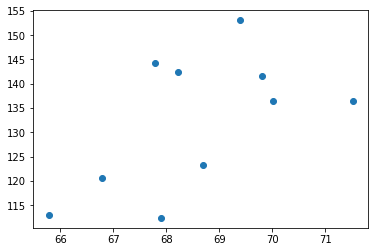

In [22]:
x= data["height"]
y= data["weight"]
plt.plot(x, y, 'o')
plt.show()

In [23]:
model = LinearRegression()
model.fit(x.values.reshape(-1,1), y)

LinearRegression()

In [24]:
model.predict([[70]])

array([139.11710897])

In [25]:
model.coef_

array([4.80362338])

In [26]:
model.intercept_

-197.13652792661082

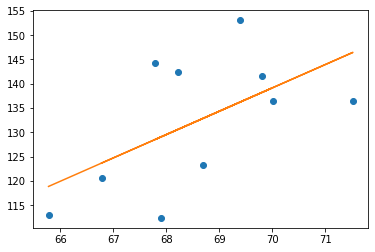

In [27]:
plt.plot(x, y, 'o')
plt.plot(x,model.predict(x.values.reshape(-1,1)))
plt.show()

- member4

In [2]:
!git clone https://github.com/mahesh147/Multiple-Linear-Regression

Cloning into 'Multiple-Linear-Regression'...


In [14]:
import pandas as pd
import numpy as np
import io
import os

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
os.chdir(r'C:\Users\winst\Downloads\menmen')

In [15]:
data = pd.read_csv('Multiple-Linear-Regression/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
X = data.iloc[:, :-1].values
simple_X = data.iloc[:, 2:3].values
Y = data.iloc[:, 4].values
X.shape, simple_X.shape, Y.shape

((50, 4), (50, 1), (50,))

In [17]:
class_Y = Y//10000
labelencoder_Y = LabelEncoder()
class_Y = labelencoder_Y.fit_transform(class_Y)

In [18]:
labelencoder_X = LabelEncoder()
X[:,3] = labelencoder_X.fit_transform(X[:,3])
ct = ColumnTransformer([("State", OneHotEncoder(), [3])], remainder = 'passthrough')
X = ct.fit_transform(X)

X = X[:, 1:]

In [19]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
simple_X_Train, simple_X_Test, Y_Train, Y_Test = train_test_split(simple_X, Y, test_size = 0.2, random_state = 0)
X_Train, X_Test, class_Y_Train, class_Y_Test = train_test_split(X, class_Y, test_size = 0.2, random_state = 0)

In [20]:
# simple linear regression

simple_regression = LinearRegression()
simple_regression.fit(simple_X_Train, Y_Train)
Y_Pred = simple_regression.predict(simple_X_Test)

In [21]:
print("Simple Linear Regression : %.4f" %simple_regression.score(simple_X_Test, Y_Test))

Simple Linear Regression : 0.4904


In [23]:
## Multiple Regression
# multiple linear regression
regression = LinearRegression()
regression.fit(X_Train, Y_Train)
Y_pred = regression.predict(X_Test)
print("Multiple Linear Regression : %.4f" %regression.score(X_Test, Y_Test))

Multiple Linear Regression : 0.9347


In [24]:
## Logistic Regression
# logistic regression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_Train, class_Y_Train)
Y_pred = logistic_regression.predict(X_Test)

In [25]:
print("Logistic Regression : %.4f" %logistic_regression.score(X_Test, class_Y_Test))

Logistic Regression : 0.3000


---

### feedback

Logistic Regression = Classification 문제 해결

따라서, 데이터셋을 바꾸는게 좀 더 좋았을거란 생각

----

## Multiple Regression

- member 1

In [30]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns=[boston.feature_names.tolist()])
data['Price'] = boston.target

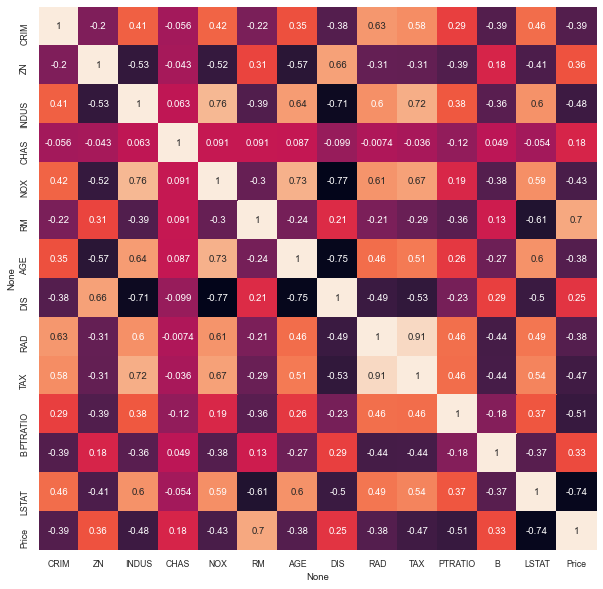

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬
corr_matrix = data.corr()

# 히트맵
plt.figure(figsize=(10, 10))
sns.set(font_scale = 0.8)
sns.heatmap(corr_matrix, annot=True, cbar=False)
plt.show()

---

## feedback

Text(0.5, 1.0, 'Heatmap of all the Features')

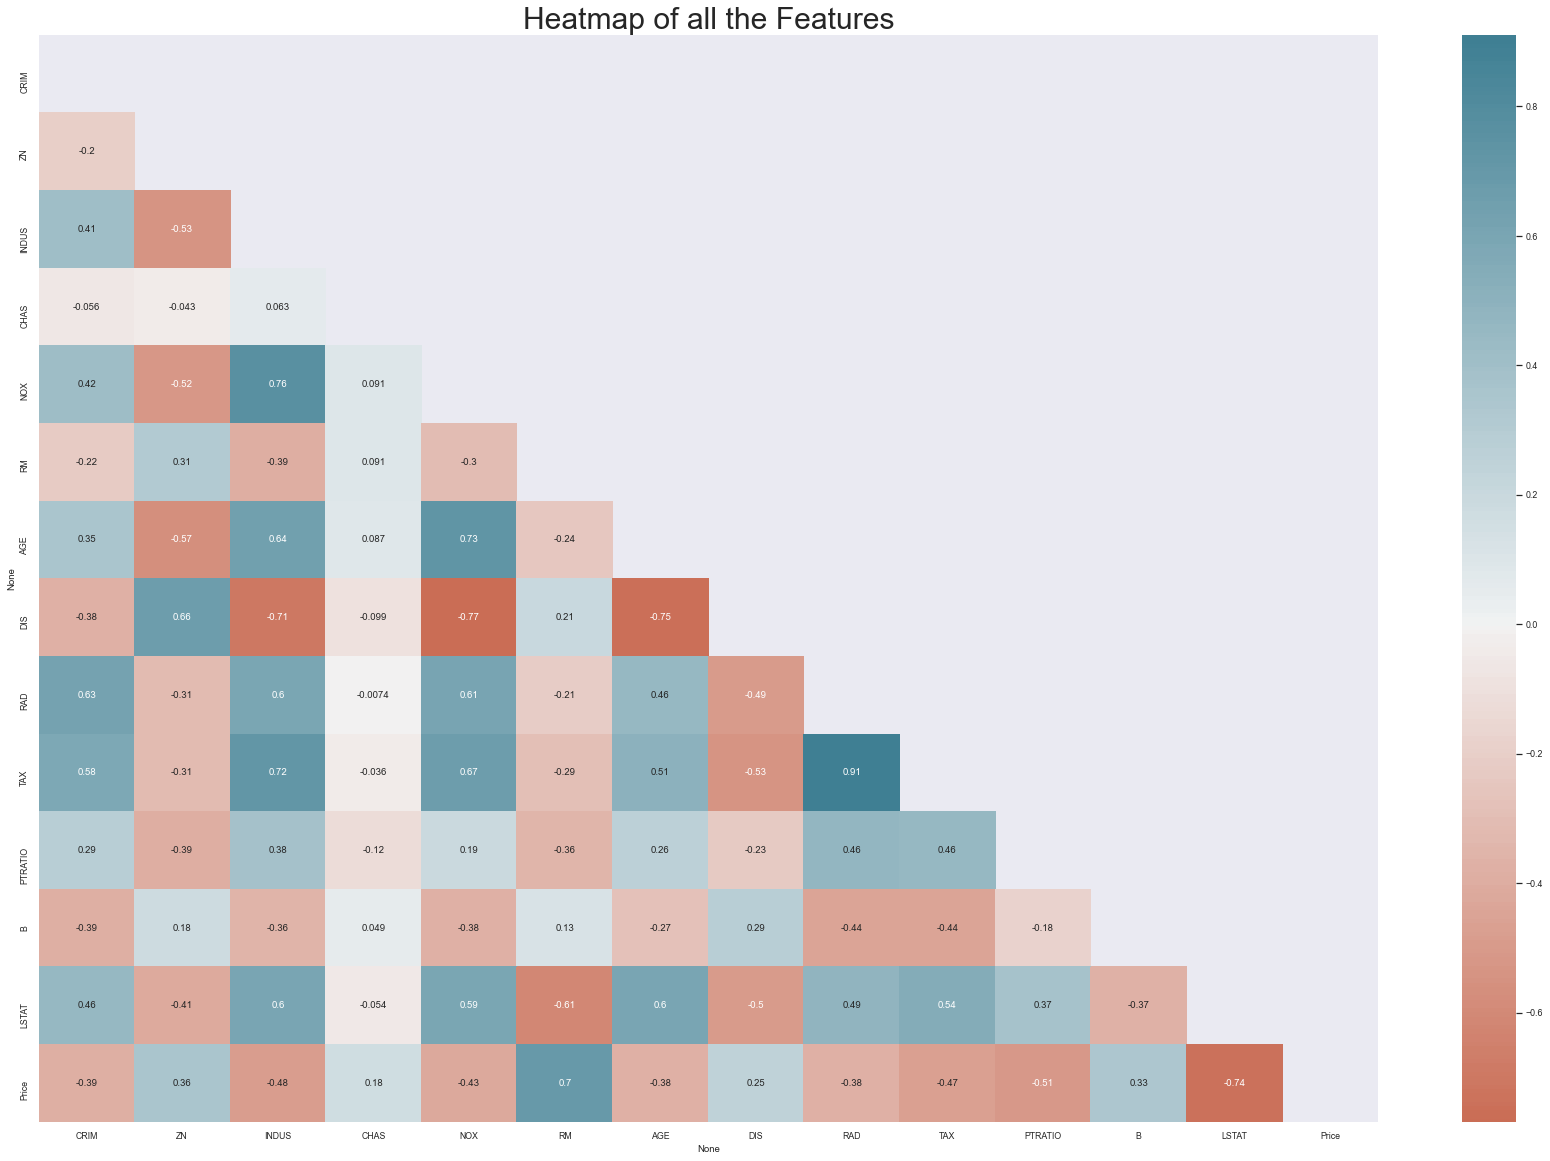

In [32]:
plt.figure(figsize=(30,20))
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(data.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, center = 0, mask=mask); 
plt.title("Heatmap of all the Features", fontsize = 30)

---

In [35]:
cols = ["Price", "LSTAT", "RM"]
data[cols]

,Price,LSTAT,RM
0,24.0,4.98,6.575
1,21.6,9.14,6.421
2,34.7,4.03,7.185
3,33.4,2.94,6.998
4,36.2,5.33,7.147
...,...,...,...
501,22.4,9.67,6.593
502,20.6,9.08,6.120
503,23.9,5.64,6.976
504,22.0,6.48,6.794


In [38]:
## 왜인지 몰겠지만 실행 안됨
cols = ["Price", "LSTAT", "RM"]
sns.pairplot(data)

ValueError: If using all scalar values, you must pass an index

Error in callback <function flush_figures at 0x000001EA506DDF70> (for post_execute):


KeyboardInterrupt: 

In [40]:
import numpy as np

x = pd.DataFrame(np.c_[data["LSTAT"], data["RM"]], columns=["LSTAT", "RM"]) # 완벽
y = data["Price"]
from sklearn.model_selection import train_test_split

# 학습한 모델을 test하기 위해 train data의 20%의 test data를 만든다
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# 선형회귀모형

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
print("회귀계수(기울기):", np.round(model.coef_, 1))
print("상수항(절편):", np.round(model.intercept_, 1))

(404, 2)
(102, 2)
(404, 1)
(102, 1)
회귀계수(기울기): [[-0.7  4.6]]
상수항(절편): [2.7]


In [41]:
from sklearn.metrics import mean_squared_error, r2_score

# train set에 대한 모델 평가
y_train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)
print("train set")
print("price is {}".format(rmse))
print("R2 Score is {}".format(r2))
print("\n")

# test set에 대한 모델 평가
y_train_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_train_predict)))
r2 = r2_score(y_test, y_train_predict)
print("train set")
print("price is {}".format(rmse))
print("R2 Score is {}".format(r2))
# 완벽

train set
price is 5.6371293350711955
R2 Score is 0.6300745149331701


train set
price is 5.137400784702911
R2 Score is 0.6628996975186953


- member2

In [43]:
import pandas as pd

Stock_Market = {'Year': [2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016],
                'Month': [12, 11,10,9,8,7,6,5,4,3,2,1,12,11,10,9,8,7,6,5,4,3,2,1],
                'Interest_Rate': [2.75,2.5,2.5,2.5,2.5,2.5,2.5,2.25,2.25,2.25,2,2,2,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75,1.75],
                'Unemployment_Rate': [5.3,5.3,5.3,5.3,5.4,5.6,5.5,5.5,5.5,5.6,5.7,5.9,6,5.9,5.8,6.1,6.2,6.1,6.1,6.1,5.9,6.2,6.2,6.1],
                'Stock_Index_Price': [1464,1394,1357,1293,1256,1254,1234,1195,1159,1167,1130,1075,1047,965,943,958,971,949,884,866,876,822,704,719]        
                }

df = pd.DataFrame(Stock_Market,columns=['Year','Month','Interest_Rate','Unemployment_Rate','Stock_Index_Price']) 
df.head()

,Year,Month,Interest_Rate,Unemployment_Rate,Stock_Index_Price
0,2017,12,2.75,5.3,1464
1,2017,11,2.50,5.3,1394
2,2017,10,2.50,5.3,1357
3,2017,9,2.50,5.3,1293
4,2017,8,2.50,5.4,1256


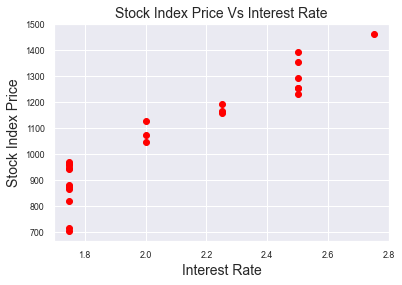

In [44]:
plt.scatter(df['Interest_Rate'], df['Stock_Index_Price'], color='red')
plt.title('Stock Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

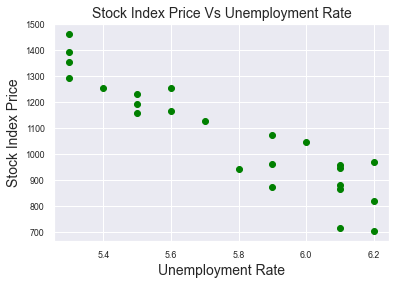

In [45]:
plt.scatter(df['Unemployment_Rate'], df['Stock_Index_Price'], color='green')
plt.title('Stock Index Price Vs Unemployment Rate', fontsize=14)
plt.xlabel('Unemployment Rate', fontsize=14)
plt.ylabel('Stock Index Price', fontsize=14)
plt.grid(True)
plt.show()

In [46]:
from sklearn import linear_model
import statsmodels.api as sm

X = df[['Interest_Rate','Unemployment_Rate']] 
Y = df['Stock_Index_Price']
 
# with sklearn
model = linear_model.LinearRegression()
model.fit(X, Y)

print('절편: ', model.intercept_)
print('기울기: ', model.coef_)

# prediction with sklearn
New_Interest_Rate = 2.75
New_Unemployment_Rate = 5.3
print ('Predicted Stock Index Price: ', model.predict([[New_Interest_Rate ,New_Unemployment_Rate]]))

절편:  1798.403977625855
기울기:  [ 345.54008701 -250.14657137]
Predicted Stock Index Price:  [1422.86238865]


- member3

데이터를 못다운받아서 boston으로 대체

In [48]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data,columns=[boston.feature_names.tolist()])
data['Price'] = boston.target

In [51]:
### feedback code = x 정의

In [52]:
from sklearn.model_selection import train_test_split

x = data.drop('Price',axis=1) # 모든 변수 호출이 아니라 drop이 더 편함
y = data[['Price']]

x_train, x_test, y_train, y_test= train_test_split(x,y,train_size=0.8,test_size=0.2)
from sklearn.linear_model import LinearRegression

model2= LinearRegression()
model2.fit(x_train,y_train)

LinearRegression()

In [54]:
y_train

,Price
411,17.2
132,23.0
369,50.0
356,17.8
11,18.9
...,...
420,16.7
464,21.4
203,48.5
316,17.8


In [61]:
# data 달라서 코드 수정
# my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]]
# my_predict = model2.predict(my_apartment)
y_predict= model2.predict(x_test)

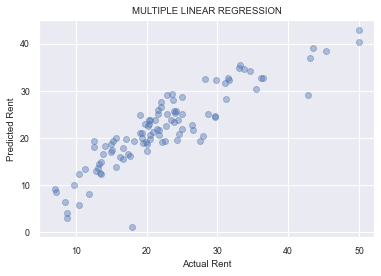

In [62]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

---

### feedback

- scatter plot으로 했을 때 직관적인 해석이 힘듦

----

In [65]:
print(model2.coef_)
print()
print(model2.intercept_)

[[-1.34086097e-01  4.60254919e-02  4.18563713e-02  2.76376633e+00
  -1.85228256e+01  3.57926739e+00  5.34550189e-03 -1.56291446e+00
   2.84763275e-01 -1.11302259e-02 -9.43985780e-01  1.06059722e-02
  -5.57194665e-01]]

[37.62916995]


In [66]:
print(model2.score(x_train, y_train))

0.7255924684411678


## Logistic Regression

- member1

In [67]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

In [69]:
tit = sns.load_dataset("titanic")
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [70]:
tit['sex'] = tit['sex'].map({'female':1,'male':0})
tit['age'].fillna(value = tit['age'].mean(), inplace = True)
tit['FirstClass'] = tit['class'].apply(lambda x: 1 if x == 1 else 0)
tit['SecondClass'] = tit['class'].apply(lambda x: 1 if x == 2 else 0)
features = tit[['sex', 'age', 'FirstClass', 'SecondClass']]
survival = tit['alive']
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

In [71]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(train_features, train_labels)

LogisticRegression()

In [72]:
# train set으로 정확도 구하기

print(model.score(train_features, train_labels))

0.7724550898203593


In [73]:
# test set으로 정확도 구하기

print(model.score(test_features, test_labels))

0.8295964125560538


In [74]:
# coefficients 확인
# 어떤 feature가 생존에 큰 영향을 주는지 확인

print(model.coef_)

[[ 2.285938   -0.00615606  0.          0.        ]]


- member2

epoch=0, 기울기=0.0600, 절편=0.0015
Error value:0.3916
epoch=1000, 기울기=0.6377, 절편=-0.5385
Error value:0.4648
epoch=2000, 기울기=0.8018, 절편=-0.6975
Error value:0.4663
epoch=3000, 기울기=0.5157, 절편=-0.7313
Error value:0.4621
epoch=4000, 기울기=0.7685, 절편=-0.7157
Error value:0.4659
epoch=5000, 기울기=0.5088, 절편=-0.7234
Error value:0.4620
epoch=6000, 기울기=0.8900, 절편=-0.7268
Error value:0.4671
epoch=7000, 기울기=1.0361, 절편=-0.7435
Error value:0.4681
epoch=8000, 기울기=0.6375, 절편=-0.7376
Error value:0.4642
epoch=9000, 기울기=0.9727, 절편=-0.7338
Error value:0.4677
epoch=10000, 기울기=0.8188, 절편=-0.7646
Error value:0.4664


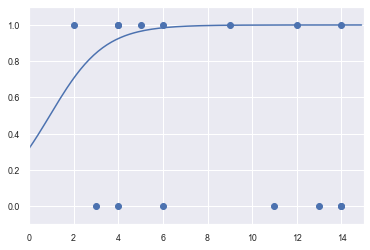

Input : 53.0, Real : 0.0, Expect: 1.0000
Input : 72.0, Real : 1.0, Expect: 1.0000
Input : 58.0, Real : 0.0, Expect: 1.0000
Input : 64.0, Real : 0.0, Expect: 1.0000
Input : 99.0, Real : 0.0, Expect: 1.0000
Input : 97.0, Real : 1.0, Expect: 1.0000
Input : 5.0, Real : 1.0, Expect: 0.9654
Input : 75.0, Real : 0.0, Expect: 1.0000
Input : 57.0, Real : 0.0, Expect: 1.0000
Input : 70.0, Real : 1.0, Expect: 1.0000


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random

x = [random.randint(1,100) for i in range(100)] # 1부터 100까지의 공부시간을 x 데이터로 만든다.
y = [random.randint(0,1) for i in range(100)] # 합격여부

x_data = np.array(x)
y_data = np.array(y)

a = 0
b = 0
lr = 0.05
loss = []

def sigmoid(x):
    return 1 / (1 + np.e ** (-x))

#경사 하강법
for i in range(10001):
    a_diff = (1/len(x_data))*sum(x_data*(sigmoid(a*x_data + b) - y_data)) 
    b_diff = (1/len(x_data))*sum(sigmoid(a*x_data + b) - y_data)
    a = a - lr * a_diff
    b = b - lr * b_diff
    y_hat = sigmoid(a * x_data + b)
    error = y_data - y_hat
    mse = (error ** 2).mean()
    loss.append(mse)
    if i % 1000 == 0:    
        print("epoch=%.f, 기울기=%.04f, 절편=%.04f" % (i, a, b))
        print("Error value:%.4f" % (mse))

#결과 출력
plt.scatter(x_data, y_data)
plt.xlim(0, 15)
plt.ylim(-.1, 1.1)
x_range = (np.arange(0, 15, 0.1)) 
plt.plot(np.arange(0, 15, 0.1), np.array([sigmoid(a*x + b) for x in x_range]))
plt.show()

for i in range(x_data.shape[0]):
    if i % 10 == 0:
        print("Input : %.1f, Real : %.1f, Expect: %.4f" % (x_data[i], y_data[i], sigmoid(a * x_data[i] + b)))

- member3

In [76]:
file3 = sns.load_dataset("titanic")
file3.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [77]:
file3['sex'] = file3['sex'].map({'female':1,'male':0})
file3['age'].fillna(value= file3['age'].mean(), inplace=True)
file3['firstclass']= file3['pclass'].apply(lambda x: 1 if x== 1 else 0)
file3['secondclass']= file3['pclass'].apply(lambda x: 1 if x== 2 else 0)
features = file3[['sex', 'age', 'firstclass', 'secondclass']]
survival = file3['survived']
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(features, survival)

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_features= scaler.fit_transform(train_features)
test_features= scaler.transform(test_features)

In [79]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(train_features, train_labels)

LogisticRegression()

In [80]:
print(model3.score(train_features, train_labels))
print(model3.score(test_features, test_labels))
print(model3.coef_)

0.7949101796407185
0.7533632286995515
[[ 1.31024466 -0.49643107  1.0655119   0.50599291]]


In [81]:
Jack = np.array([0.0, 20.0, 0.0, 0.0])
me= np.array([1.0, 25.0, 1.0, 0.0])
sample= np.array([Jack, me])
sample= scaler.transform(sample)
print(model3.predict(sample))
print(model3.predict_proba(sample))

[0 1]
[[0.88910352 0.11089648]
 [0.04871962 0.95128038]]
